In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import comb

reg_id_df = pd.read_csv("registry_ids.csv")
loc_ids=reg_id_df.iloc[:,0]

In [2]:

def read_and_process_file(file_path):
    result_list = []

    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()

            # Extract every second line
            for i in range(1, len(lines), 2):
                line = lines[i].strip()

                # Split the line into a list of integers
                integer_series = list(map(int, line.split()))

                result_list.append(integer_series)

        return result_list

    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None
    except Exception as e:
        print("An error occurred:", e)
        return None

def normalize_read_list(list):
    line_counter=0
    for line in list:
        sum=0
        for element in line:
            sum=sum+element
        element_counter=0
        for element in line:
            list[line_counter][element_counter]=element/sum
            element_counter+=1
        line_counter+=1

def create_histogram(x, y, xlabel='X-axis', ylabel='Y-axis', title='Histogram'):
    x = np.array(x)
    y = np.array(y)
    plt.figure(figsize=(8, 6))
    plt.hist(x, bins=np.arange(min(x), max(x) + 1) - 0.5, weights=y, edgecolor='black', alpha=0.7)
    plt.xlabel(xlabel, fontname='Times New Roman', fontsize=12)
    plt.ylabel(ylabel, fontname='Times New Roman', fontsize=12)
    #plt.title(title, fontname='Times New Roman', fontsize=12)
    plt.xticks(fontname='Times New Roman', fontsize=12)
    plt.yticks(fontname='Times New Roman', fontsize=12)

    plt.xticks(np.arange(min(x), max(x) + 1))
    plt.savefig("2d_histogram.png", dpi=300)   
    plt.show()

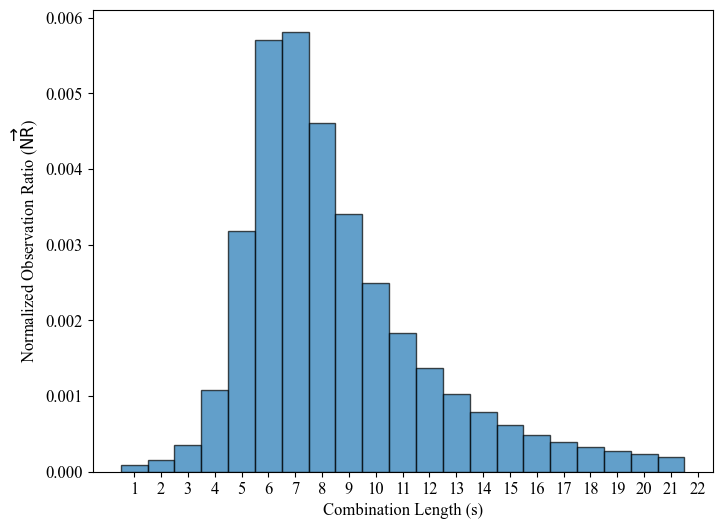

In [3]:

master_top_10=[[0,0] for i in range(20)]
file_name="recorder.txt"
read_list=read_and_process_file(file_name)
normalize_read_list(read_list)
best_res=np.array(read_list)[:,15884]

x=[i for i in range(1,23)]
create_histogram(x,best_res,xlabel="Combination Length (s)",ylabel="Normalized Observation Ratio ($\overrightarrow{\mathrm{NR}}$)")
print()